In [1]:
library(tseries)
library(forecast)
library(astsa)


Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



In [2]:
traffic = read.csv(file = 'Train_SU63ISt.csv')
attach(traffic)

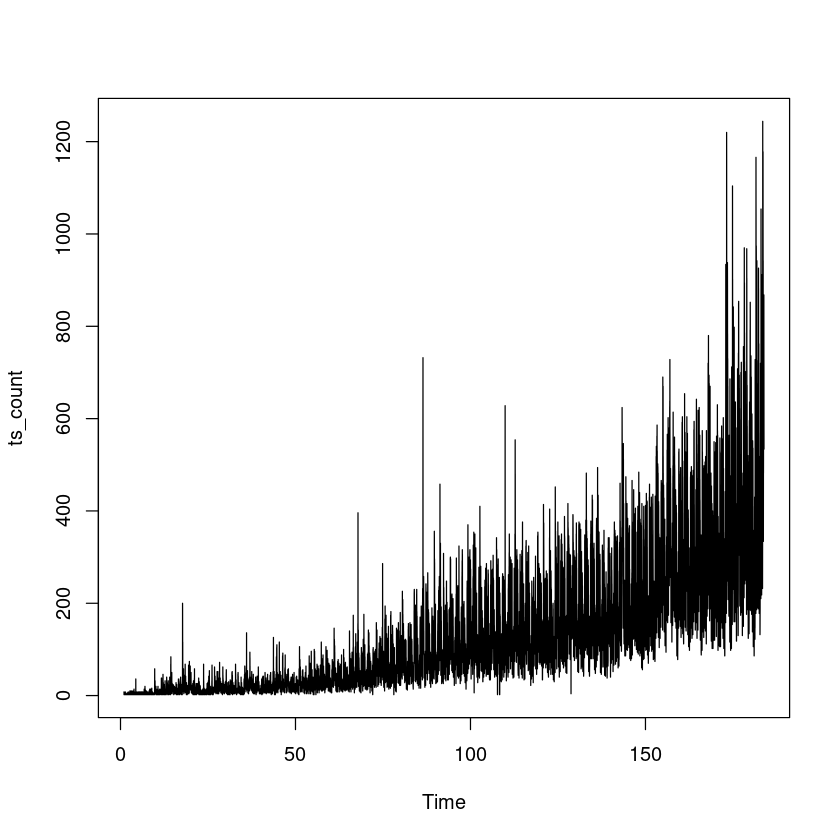

In [3]:
ts_count = ts(Count, frequency = 100)
ts.plot(ts_count)

In [4]:
adf_count = adf.test(ts_count)
adf_count

Warning message in adf.test(ts_count):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  ts_count
Dickey-Fuller = -13.901, Lag order = 26, p-value = 0.01
alternative hypothesis: stationary


## First Differencing

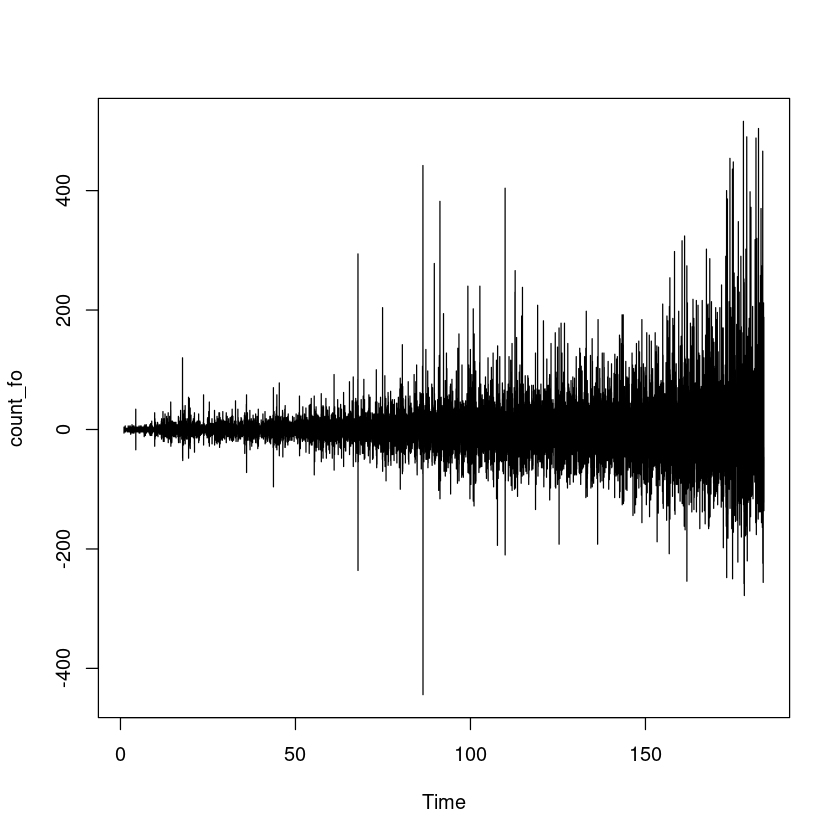

In [5]:
count_fo = diff(ts_count)
plot(count_fo)

## Second Differencing

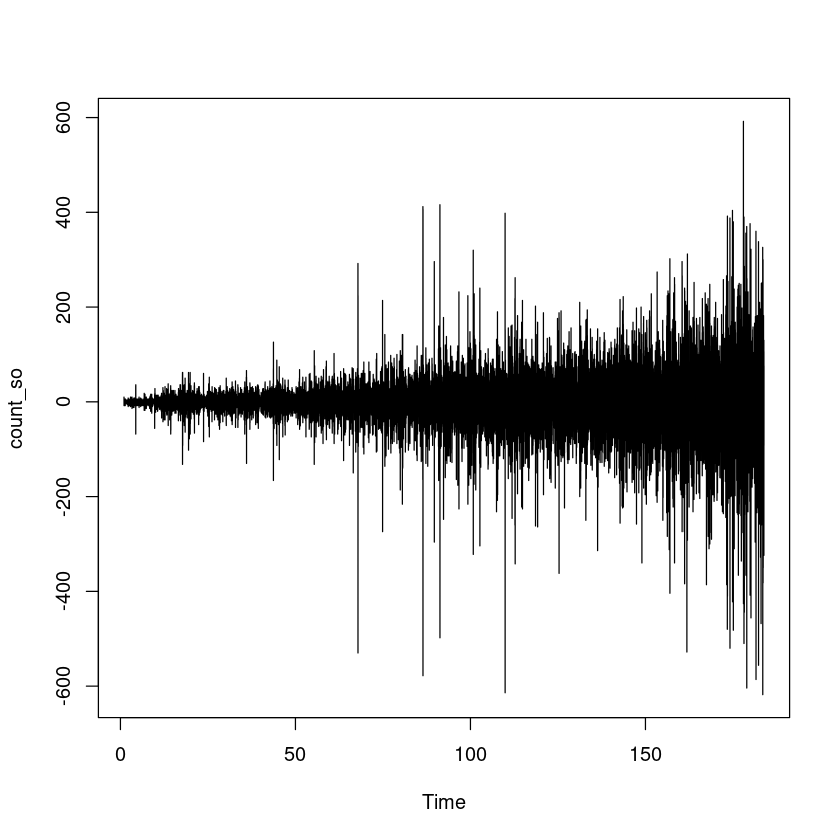

In [6]:
count_so = diff(count_fo)
plot(count_so)

In [7]:
count_fotest = adf.test(count_fo)
count_fotest

Warning message in adf.test(count_fo):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  count_fo
Dickey-Fuller = -28.298, Lag order = 26, p-value = 0.01
alternative hypothesis: stationary


## ACF plot

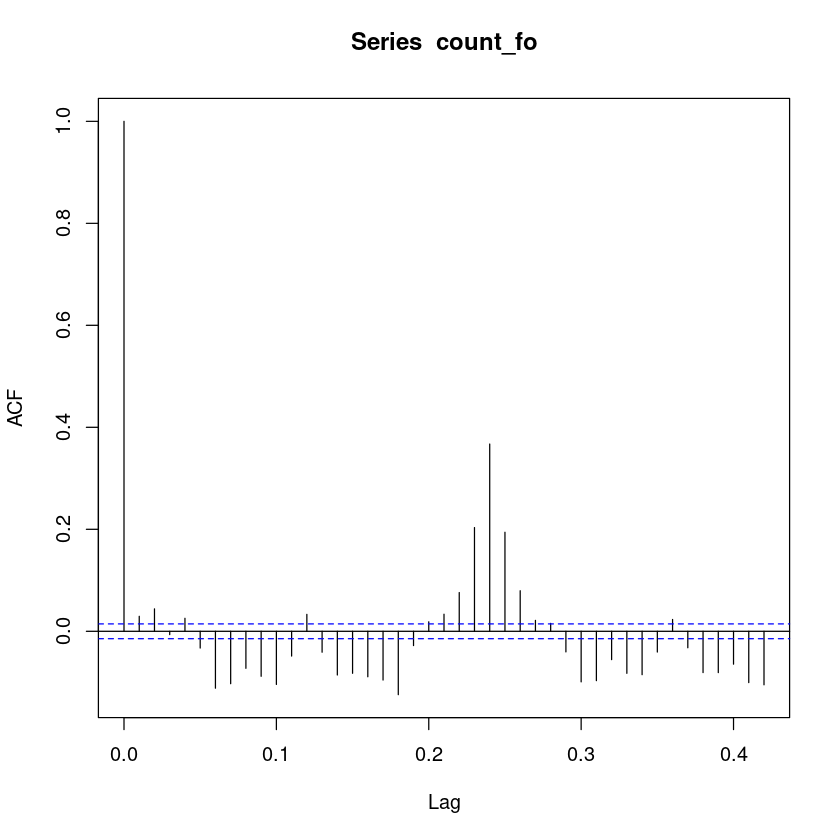

In [8]:
acf(count_fo)

## PACF plot

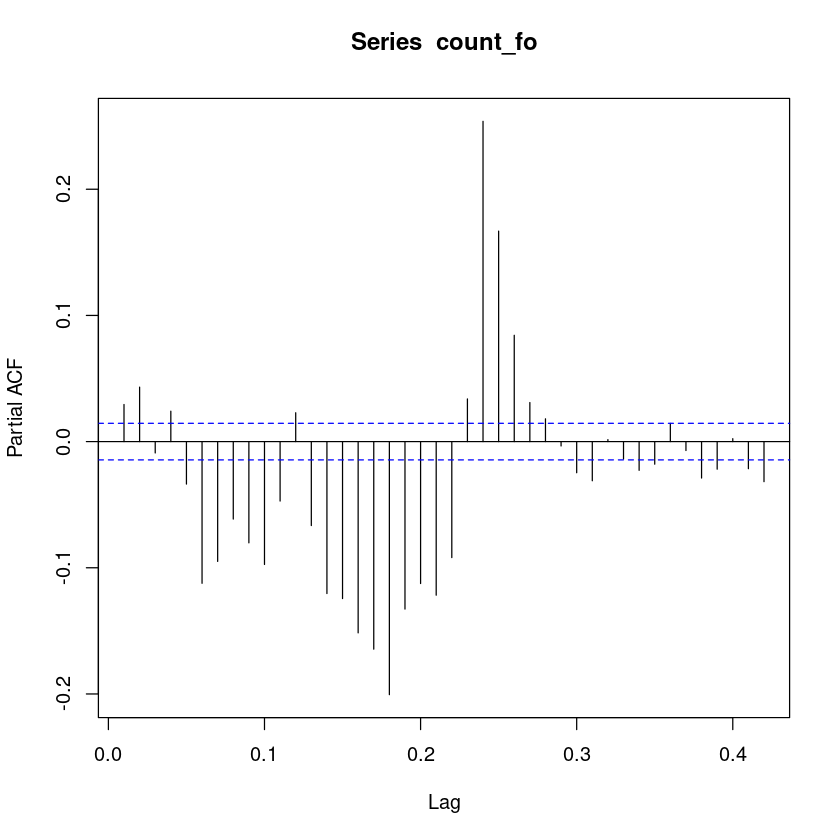

In [9]:
pacf(count_fo)

## ARIMA model

In [10]:
count_fit = auto.arima(ts_count, seasonal = FALSE)
count_fit

Series: ts_count 
ARIMA(2,1,1) 

Coefficients:
          ar1     ar2     ma1
      -0.2817  0.0529  0.3107
s.e.   0.1548  0.0081  0.1550

sigma^2 estimated as 1679:  log likelihood=-93846.77
AIC=187701.5   AICc=187701.5   BIC=187732.8

In [11]:
count_fit1 = arima(ts_count, order = c(1,1,1))
count_fit1


Call:
arima(x = ts_count, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.4110  -0.3742
s.e.  0.0676   0.0684

sigma^2 estimated as 1681:  log likelihood = -93859.09,  aic = 187724.2

## Holt Winters

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = count_so, gamma = FALSE)

Smoothing parameters:
 alpha: 0.015373
 beta : 0.7625018
 gamma: FALSE

Coefficients:
        [,1]
a 0.16367621
b 0.04685671

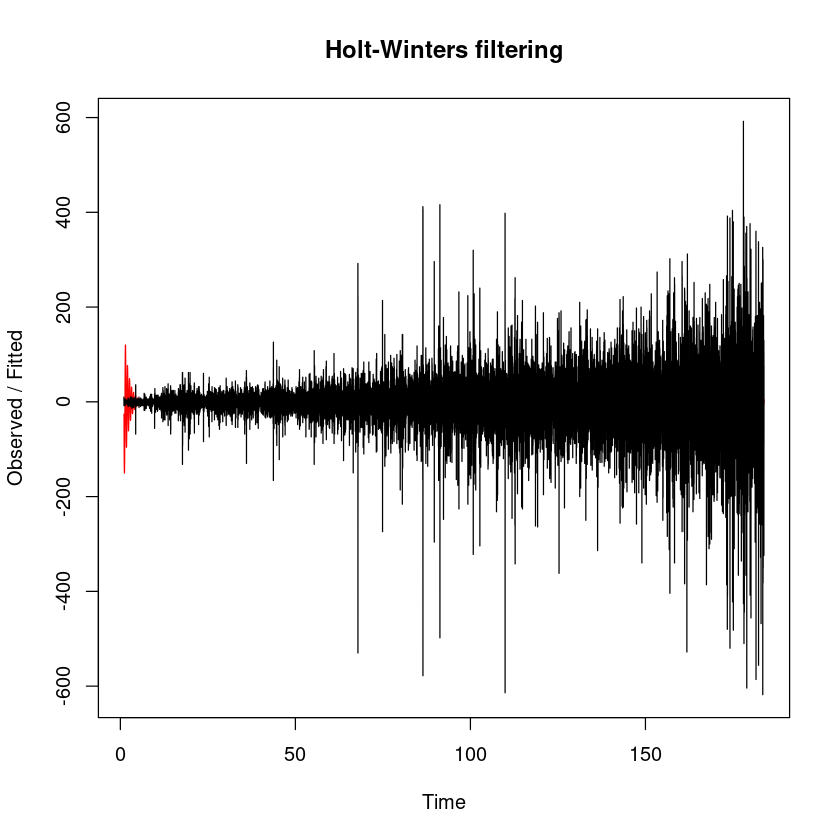

In [12]:
count_forcast <- HoltWinters(count_so, gamma = FALSE) 
count_forcast
plot(count_forcast)

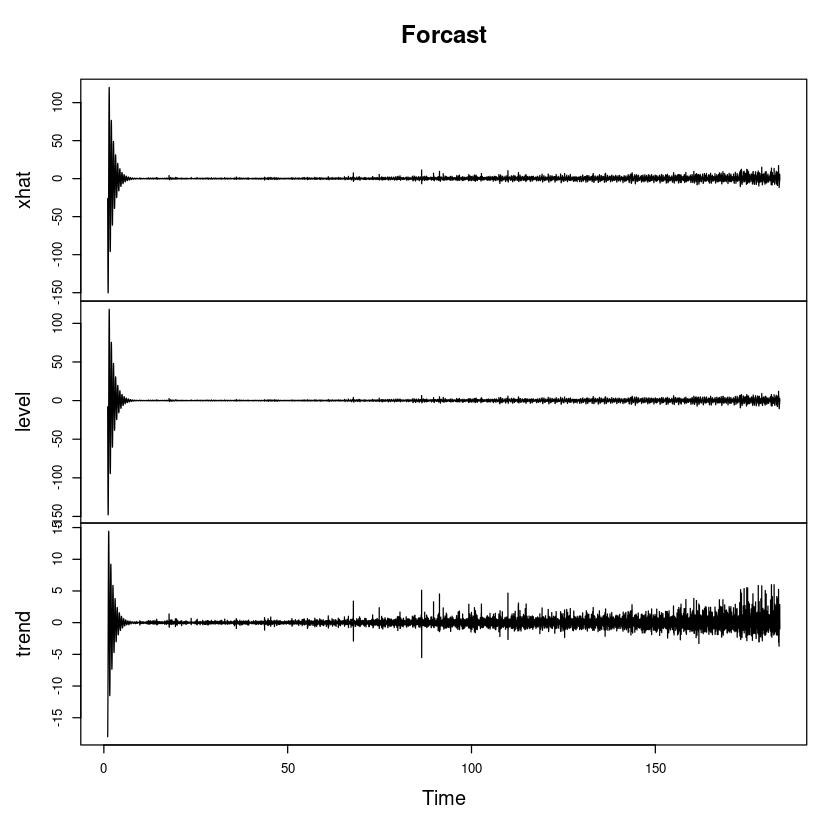

In [13]:
Forcast = count_forcast$fitted
plot(Forcast)

        Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
183.880      0.2105329 -74.66028 75.08134 -114.2945 114.7156
183.890      0.2573896 -74.64090 75.15568 -114.2897 114.8044
183.900      0.3042463 -74.65041 75.25890 -114.3290 114.9375
183.910      0.3511030 -74.69900 75.40120 -114.4281 115.1303
183.920      0.3979598 -74.79677 75.59269 -114.6025 115.3984
183.930      0.4448165 -74.95365 75.84329 -114.8672 115.7568
183.940      0.4916732 -75.17935 76.16270 -115.2372 116.2205
183.950      0.5385299 -75.48326 76.56032 -115.7268 116.8038
183.960      0.5853866 -75.87437 77.04515 -116.3497 117.5205
183.970      0.6322433 -76.36121 77.62569 -117.1191 118.3836

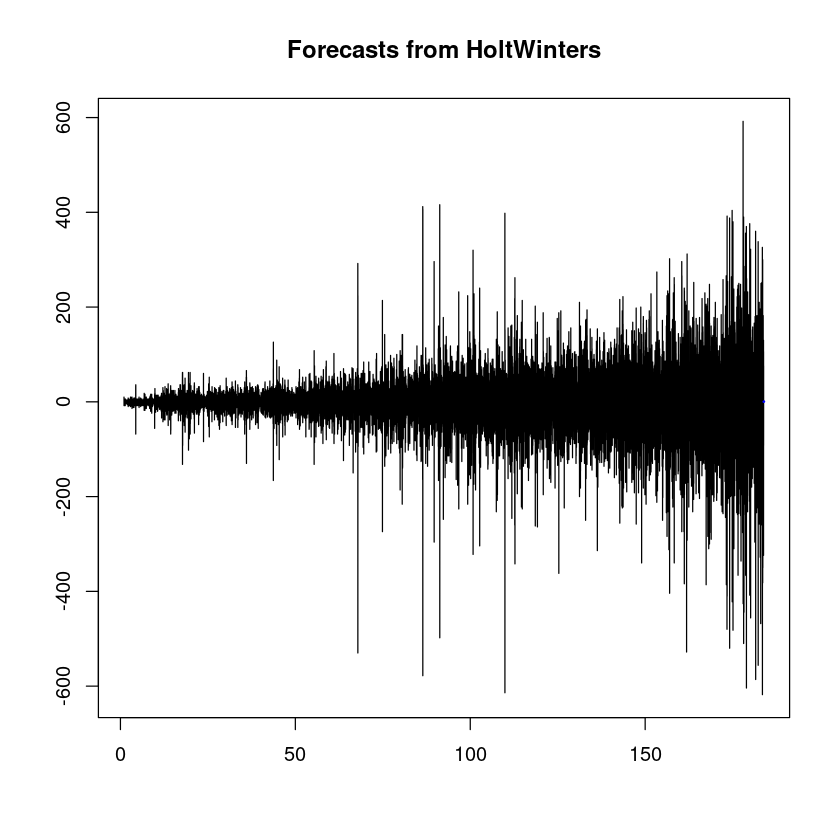

In [14]:
count_data = forecast(count_forcast, h = 10)
plot(count_data)
count_data